<a href="https://colab.research.google.com/github/riyamotwaniii/bml-exp-1-12/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

manual implementation


Final Centroids:
 [[30.  46. ]
 [50.4 93. ]]


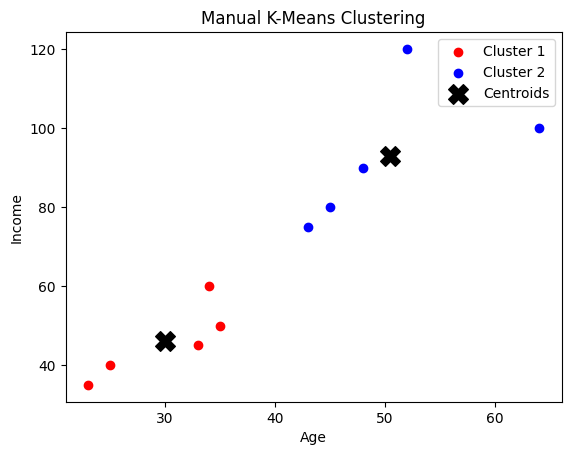

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Market Segmentation Data (Age, Income in thousands)
X = np.array([
    [25, 40],
    [34, 60],
    [45, 80],
    [23, 35],
    [52, 120],
    [43, 75],
    [35, 50],
    [64, 100],
    [33, 45],
    [48, 90]
])

# Step 1: Choose number of clusters (K)
K = 2

# Step 2: Initialize centroids randomly from data points
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], K, replace=False)]

for iteration in range(10):  # Repeat for fixed iterations
    # Step 3: Assign each point to nearest centroid
    clusters = {}
    for k in range(K):
        clusters[k] = []

    for point in X:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)

    # Step 4: Update centroids (mean of cluster points)
    new_centroids = []
    for k in range(K):
        if clusters[k]: # Check if cluster is not empty
            new_centroids.append(np.mean(clusters[k], axis=0))
        else:
            new_centroids.append(centroids[k]) # Keep old centroid if cluster is empty

    new_centroids = np.array(new_centroids)

    # Stop if centroids do not change
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

# Final clusters
print("Final Centroids:\n", centroids)

# Plotting
colors = ['red', 'blue', 'green']
for k, points in clusters.items():
    points = np.array(points)
    plt.scatter(points[:,0], points[:,1], c=colors[k], label=f'Cluster {k+1}')

plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Manual K-Means Clustering")
plt.legend()
plt.show()